## Aviation Data Analysis

## Overview


This project analyzes aviation incident data to improve safety by identifying trends, high-risk regions, and key factors like weather and aircraft type. Using descriptive analysis and visualizations, it highlights patterns and regions with frequent incidents. Key recommendations include predictive maintenance, targeted safety training, and focusing on high-risk areas to reduce incidents and enhance safety.

## Business Problem

The aviation industry faces significant risks due to accidents and incidents, which can lead to loss of life, financial repercussions, and damage to brand reputation. Understanding historical incident data is crucial for identifying trends, high-risk areas, and contributing factors, which can help industry stakeholders implement effective safety measures.


## Data Understanding
The data for this project is sourced from an aviation incident database. This dataset likely represents records of aviation incidents or accidents reported across different locations and time period. It is structured and includes various fields detailing each incident, such as the date, location, type of aircraft, damage sustained, and weather conditions.

In [8]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:

df = pd.read_csv('AviationData.csv', encoding='latin1')
df.head()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24300\4228909250.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [23]:
df.shape

(88889, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [12]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Data Cleaning


In [15]:
df['Country'].isna().sum()

226

In [16]:
df['Country'].value_counts(normalize=True)

Country
United States                       0.927647
Brazil                              0.004218
Canada                              0.004049
Mexico                              0.004038
United Kingdom                      0.003880
                                      ...   
Seychelles                          0.000011
Palau                               0.000011
Libya                               0.000011
Saint Vincent and the Grenadines    0.000011
Turks and Caicos Islands            0.000011
Name: proportion, Length: 219, dtype: float64

In [17]:
# Replace missing values in object (categorical) columns with "Unknown"
df.select_dtypes(include='object').fillna("Unknown", inplace=True)

# Replace missing values in numeric columns with 0
df.select_dtypes(include='number').fillna(0, inplace=True)


In [18]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [24]:
df['Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

In [25]:
df["Amateur.Built"].unique()

array(['No', 'Yes', nan], dtype=object)

## Data Analysis



In [28]:
df.columns = df.columns.str.strip().str.lower().str.replace('.', '_')
essential_columns = ['event_id', 'event_date', 'location', 'country']
cleaned_data = df.dropna(subset=essential_columns)

In [30]:
cleaned_data.loc[:, 'event_date'] = pd.to_datetime(cleaned_data['event_date'], errors='coerce')



In [31]:
cleaned_data = cleaned_data.dropna(subset=['event_date'])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88612 non-null  object        
 1   investigation_type      88612 non-null  object        
 2   accident_number         88612 non-null  object        
 3   event_date              88612 non-null  datetime64[ns]
 4   location                88612 non-null  object        
 5   country                 88612 non-null  object        
 6   latitude                34376 non-null  object        
 7   longitude               34367 non-null  object        
 8   airport_code            50063 non-null  object        
 9   airport_name            52623 non-null  object        
 10  injury_severity         87612 non-null  object        
 11  aircraft_damage         85441 non-null  object        
 12  aircraft_category       32266 non-null  object     

In [32]:
cleaned_data['year'] = cleaned_data['event_date'].dt.year
incidents_per_year = cleaned_data.groupby('year').size()
incidents_per_year

year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3583
1983    3534
1984    3439
1985    3082
1986    2869
1987    2810
1988    2715
1989    2531
1990    2502
1991    2448
1992    2342
1993    2305
1994    2246
1995    2298
1996    2177
1997    2137
1998    2209
1999    2196
2000    2209
2001    2059
2002    2017
2003    2082
2004    1948
2005    2028
2006    1850
2007    2013
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

In [33]:
incidents_by_country = cleaned_data['country'].value_counts()
incidents_by_country.head(10)

country
United States     82237
Brazil              373
Canada              359
Mexico              358
United Kingdom      344
Australia           298
France              233
Spain               226
Bahamas             216
Germany             215
Name: count, dtype: int64

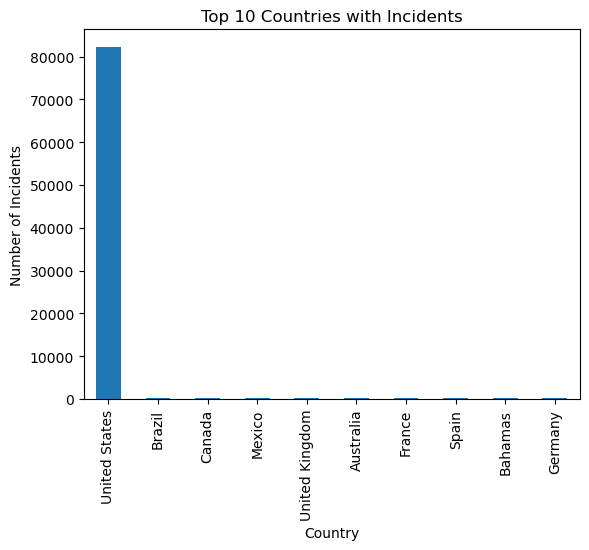

In [34]:
top_countries = incidents_by_country.head(10)
top_countries.plot(kind='bar', title='Top 10 Countries with Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.show()

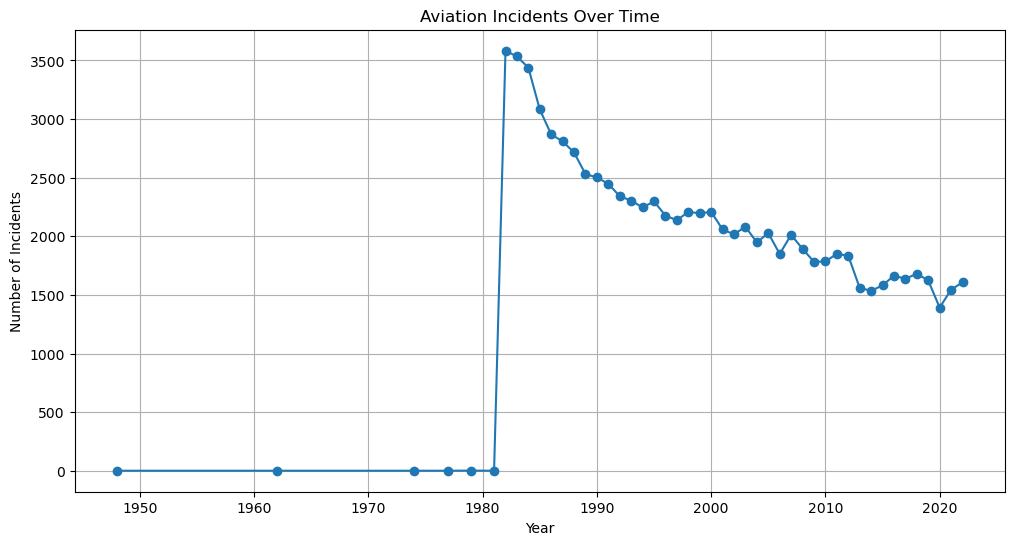

In [35]:
cleaned_data['year'] = cleaned_data['event_date'].dt.year
incidents_per_year = cleaned_data.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
incidents_per_year.plot(kind='line', marker='o', title='Aviation Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid()
plt.show()

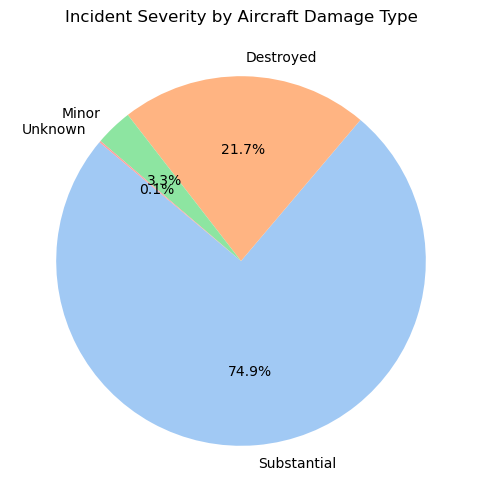

In [36]:
# Count incidents by aircraft damage type
damage_counts = cleaned_data['aircraft_damage'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
damage_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Incident Severity by Aircraft Damage Type')
plt.ylabel('')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24300\1905720360.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='Blues_d')


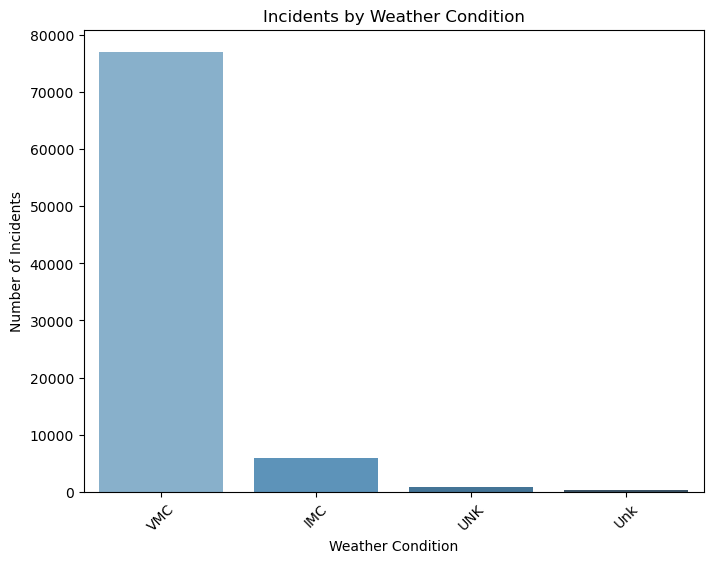

In [38]:
# Count incidents by weather condition
weather_counts = cleaned_data['weather_condition'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='Blues_d')
plt.title('Incidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

